# Importing library

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

# Without considering Categorical variable

# Loading data

In [2]:
df=pd.read_csv(r"D:\Emk assignment\audi.csv")
display(df.head())
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


(10668, 8)


# Checking corelations

In [3]:
df_corr=df.corr()
df_corr

,year,price,mileage,mpg,engineSize
year,1.000000,0.592581,-0.789667,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,0.395103,0.070710
mpg,-0.351281,-0.600334,0.395103,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,-0.365621,1.000000


# Plotting the corr

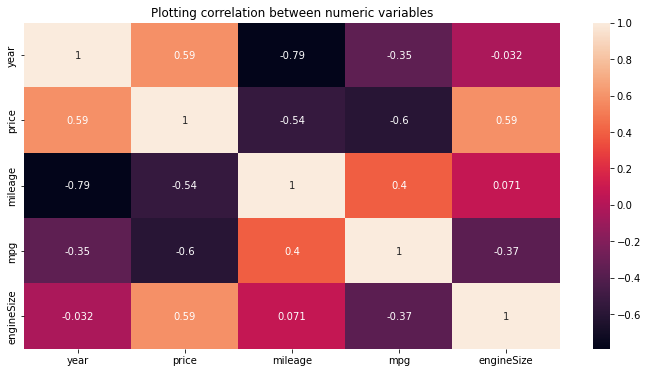

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,annot=True)
plt.title("Plotting correlation between numeric variables")
plt.show()

# Separating target and feature variable

In [5]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [6]:
features=['year','mileage','engineSize']    ########## removing 'mpg' due to low corelation ####
target=['price']
x=df[features]
y=df[target]

print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (10668, 3)
shape of y (10668, 1)


# Create train and test set

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8534, 3) (2134, 3) (8534, 1) (2134, 1)


# Model building

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print("value of C (bias):",reg.intercept_)
print("value of Co efficient",reg.coef_)

value of C (bias): [-4463782.05352997]
value of Co efficient [[ 2.21441834e+03 -1.26244953e-01  1.19309651e+04]]


In [10]:
coef_df=pd.DataFrame({"feature":x.columns,"Coefficient":np.squeeze(reg.coef_)
    
})

In [11]:
coef_df

,feature,Coefficient
0,year,2214.418337
1,mileage,-0.126245
2,engineSize,11930.965053


# Prediction

In [12]:
y_pred=reg.predict(X_test)
y_pred

array([[ 9240.4451089 ],
       [25668.69459405],
       [30106.78397928],
       ...,
       [16724.74399787],
       [25892.65314109],
       [13405.00670759]])

In [13]:
y_pred=np.squeeze(y_pred)

In [14]:
y_test=y_test.to_numpy()

In [15]:
y_test

array([[ 9990],
       [22382],
       [28990],
       ...,
       [16750],
       [21996],
       [ 9547]], dtype=int64)

In [16]:
y_test=np.squeeze(y_test)

In [17]:
y_test

array([ 9990, 22382, 28990, ..., 16750, 21996,  9547], dtype=int64)

In [18]:
y_pred

array([ 9240.4451089 , 25668.69459405, 30106.78397928, ...,
       16724.74399787, 25892.65314109, 13405.00670759])

In [19]:
reg_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [20]:
reg_df

,actual,predicted
0,9990,9240.445109
1,22382,25668.694594
2,28990,30106.783979
3,30777,26743.923021
4,14950,14411.275638
...,...,...
2129,31450,30946.186673
2130,12900,21675.774186
2131,16750,16724.743998
2132,21996,25892.653141


In [21]:
true=np.array(y_test)

In [22]:
true

array([ 9990, 22382, 28990, ..., 16750, 21996,  9547], dtype=int64)

In [23]:
ranges= list(range(len(true)))

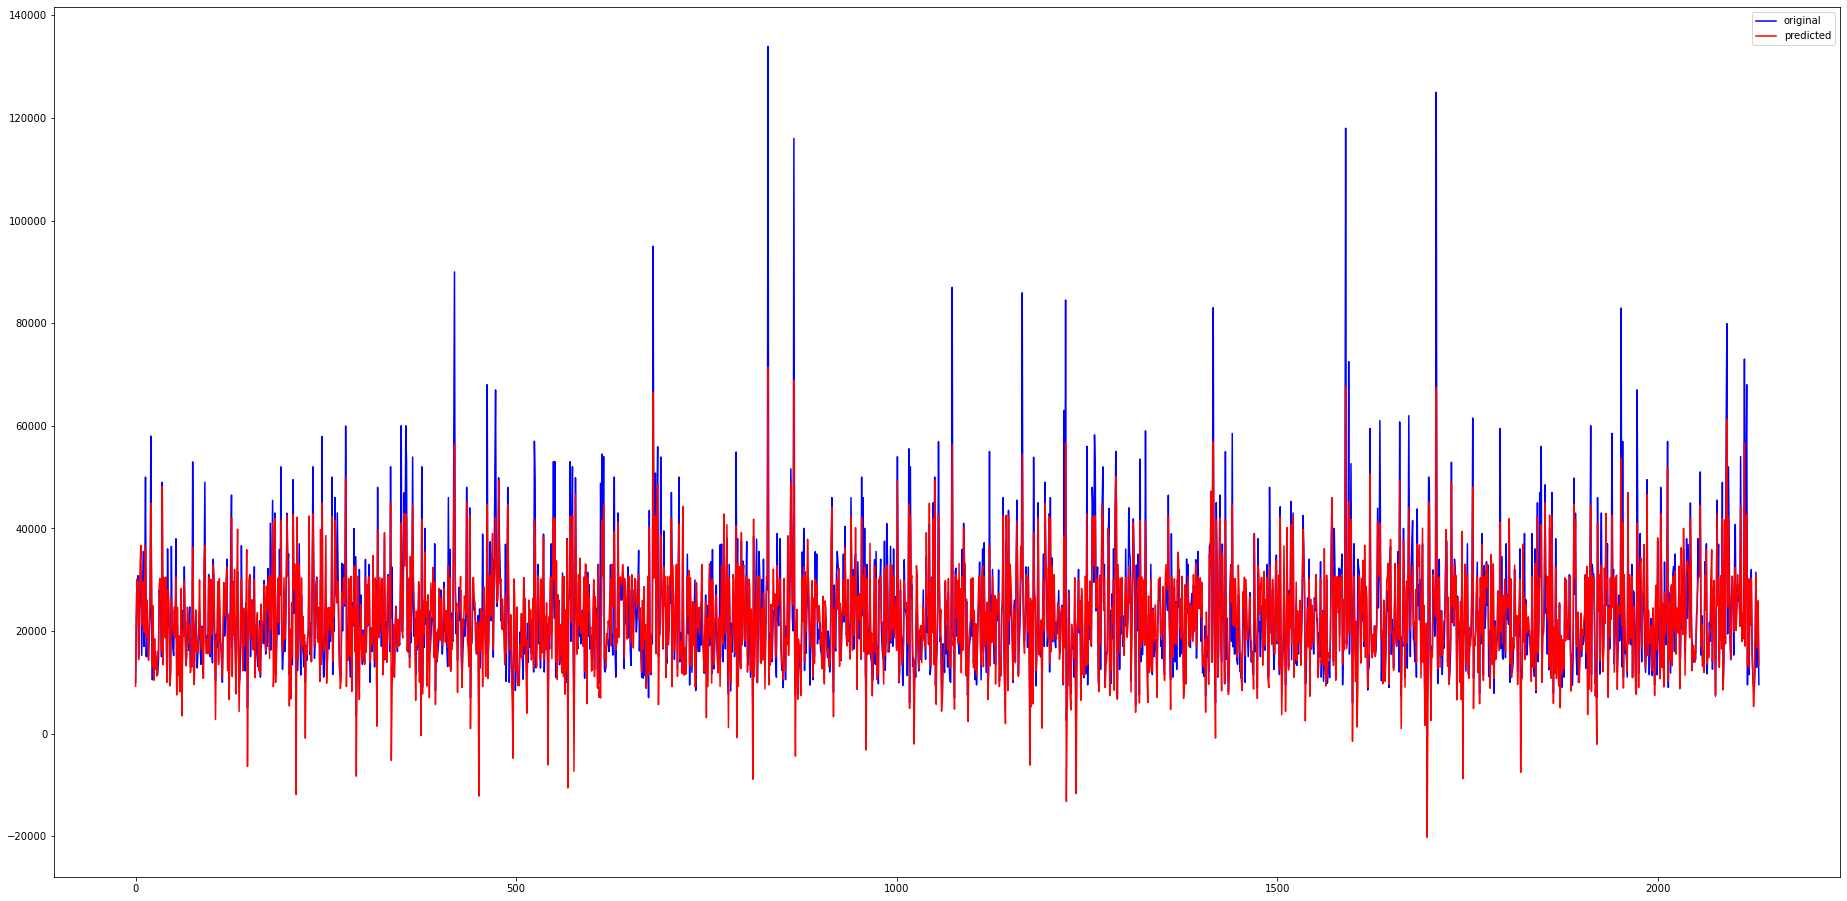

In [24]:
plt.figure(figsize=(32,16))
plt.plot(ranges, true, color="blue", label="original")
plt.plot(ranges, y_pred, color="red", label="predicted")
plt.legend()
plt.show() 

In [25]:
mae = mean_absolute_error(true, y_pred)
mape=mae*100
mse =mean_squared_error(true, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(true, y_pred)

print("Results of sklearn.metrics:")

print("MAE:",mae)
print("MAE:",mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3887.4328712114047
MAE: 388743.28712114046
MSE: 36918005.883947715
RMSE: 6076.018917346103
R-Squared: 0.7557193921157271


# Considering Categocial value 

#                                               One hot Encoding 

In [26]:
df = pd.get_dummies(df, drop_first=True)

In [27]:
df

,year,price,mileage,mpg,engineSize,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2016,16500,36203,64.2,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,55.4,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2017,16800,25952,67.3,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,2020,16999,4018,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10664,2020,16999,1978,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10665,2020,17199,609,49.6,1.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10666,2017,19499,8646,47.9,1.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
x=df.drop('price',axis=1)
y=df['price']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8534, 33) (2134, 33) (8534,) (2134,)


Model Train using one hot encoding

In [30]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

Bias and Co effients

In [31]:
print("value of C (bias) for reg1 model:",reg1.intercept_)
print("value of Co efficient for reg1 model",reg1.coef_)

value of C (bias) for reg1 model: -4060707.7430760805
value of Co efficient for reg1 model [ 2.02426273e+03 -7.60956537e-02 -1.69246070e+02  4.25397380e+03
  2.25789491e+04  1.28984286e+03  1.59468836e+03  2.66742740e+03
  3.61596237e+03  4.17450974e+03  8.12994033e+03  7.33690353e+02
  2.64325822e+03  6.63934079e+03  1.51972424e+04  2.61682974e+04
  5.84973722e+04  9.16846823e+03  2.04662163e+04  1.82852896e+04
  2.56291070e+04  1.82990334e-09  3.49441546e+03  9.43997888e+03
  1.29599622e+03  4.25410479e+03  8.18448332e+03  1.91566875e+04
  3.10652179e+03 -1.20598677e+03  1.04877197e+02  2.33994959e+04
 -4.13925048e+02]


In [32]:
coef_df=pd.DataFrame({"feature":x.columns,"Coefficient":np.squeeze(reg1.coef_)})

In [33]:
coef_df

,feature,Coefficient
0,year,2.024263e+03
1,mileage,-7.609565e-02
2,mpg,-1.692461e+02
3,engineSize,4.253974e+03
4,model_ A2,2.257895e+04
5,model_ A3,1.289843e+03
6,model_ A4,1.594688e+03
7,model_ A5,2.667427e+03
8,model_ A6,3.615962e+03
9,model_ A7,4.174510e+03


In [34]:
y_pred=reg1.predict(X_test)

In [35]:
y_pred

array([ 6610.13223031, 24138.50809734, 29867.94104515, ...,
       16285.06313704, 24273.50178707, 10427.25104041])

In [36]:
y_test

10442     9990
2907     22382
7388     28990
3016     30777
7890     14950
         ...  
8606     31450
8977     12900
3673     16750
1034     21996
6867      9547
Name: price, Length: 2134, dtype: int64

 # Find the MAE, MAPE, MSE, RMSE, coefficient of determination values amnually

creating dataframe using reg1 model's prediction

In [37]:
reg1_df = pd.DataFrame({"actual":y_test, "predicted":y_pred})

In [38]:
reg1_df

,actual,predicted
10442,9990,6610.132230
2907,22382,24138.508097
7388,28990,29867.941045
3016,30777,27902.301525
7890,14950,15762.909506
...,...,...
8606,31450,29729.178210
8977,12900,15797.205062
3673,16750,16285.063137
1034,21996,24273.501787


In [39]:
##### MAE

##step1:  Actual - predicted

reg1_df['residuals']=reg1_df['actual']-reg1_df['predicted']

# step2 : abs of  Actual - predicted
reg1_df['absolute']= np.abs(reg1_df['residuals'])

##step3:  average of absolute value
MAE= reg1_df['absolute'].mean()




#########  MSE

## step1: square of  Actual - predicted 
reg1_df['square']=reg1_df['residuals']**2

##step2: average of square value

MSE= np.mean(reg1_df['square'])    #### Another way to find mean using numpy


#######  RMSE  == square root of MSE

RMSE=np.round(np.sqrt(MSE),2)


##### MAPE(mean absulate percentage error)

### step1: (actual-predicted)/actual
reg1_df['residuals/actual']=reg1_df['residuals']/reg1_df['actual']

####step2:   absolute of (actual-predicted)/actual
reg1_df['residuals/actual_absolute']=reg1_df['residuals/actual'].abs()

## step3:   average of absolute of (actual-predicted)/actual

MAPE=reg1_df['residuals/actual_absolute'].mean()




###### coefficient of determination (R2)
####step1 (actual-predicted)^2 (calculated in reg1_df['square'] above)

## step2 (actual-mean of actual value)^2   

reg1_df['actual-mean']=(reg1_df['actual']-reg1_df['actual'].mean())**2


#### step3
R2=np.round(1-(reg1_df['square'].sum()/reg1_df['actual-mean'].sum()),2)


reg1_df

,actual,predicted,residuals,absolute,square,residuals/actual,residuals/actual_absolute,actual-mean
10442,9990,6610.132230,3379.867770,3379.867770,1.142351e+07,0.338325,0.338325,1.743016e+08
2907,22382,24138.508097,-1756.508097,1756.508097,3.085321e+06,-0.078479,0.078479,6.566421e+05
7388,28990,29867.941045,-877.941045,877.941045,7.707805e+05,-0.030284,0.030284,3.361292e+07
3016,30777,27902.301525,2874.698475,2874.698475,8.263891e+06,0.093404,0.093404,5.752715e+07
7890,14950,15762.909506,-812.909506,812.909506,6.608219e+05,-0.054375,0.054375,6.793608e+07
...,...,...,...,...,...,...,...,...
8606,31450,29729.178210,1720.821790,1720.821790,2.961228e+06,0.054716,0.054716,6.818904e+07
8977,12900,15797.205062,-2897.205062,2897.205062,8.393797e+06,-0.224590,0.224590,1.059322e+08
3673,16750,16285.063137,464.936863,464.936863,2.161663e+05,0.027757,0.027757,4.150367e+07
1034,21996,24273.501787,-2277.501787,2277.501787,5.187014e+06,-0.103542,0.103542,1.431216e+06


In [40]:
print("MAE:",MAE)
print("MAPE:",MAPE*100,'%')
print("MSE:",MSE)
print('RMSE',RMSE)
print('R2:',R2)


MAE: 2720.087568599492
MAPE: 13.502741779458297 %
MSE: 17229727.462187313
RMSE 4150.87
R2: 0.89


# Calculating all values using Scikit learn

In [41]:
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

MAPE=mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE*100,"%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)   ### Squared= True means means square error, Squared= false means rmse
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  2720.087568599492
mean absolute percentage error =  13.502741779458297 %
mean squared error =  17229727.462187313
root mean squared error =  4150.870687239884
coefficient of determination =  0.8859936175487331


# Visualiazation of reg1 model

In [42]:
visualize=pd.DataFrame({'actual':y_test,'prediction':y_pred})
visualize['x'] = np.arange(0,y_test.shape[0],1).tolist()

In [43]:
visualize

,actual,prediction,x
10442,9990,6610.132230,0
2907,22382,24138.508097,1
7388,28990,29867.941045,2
3016,30777,27902.301525,3
7890,14950,15762.909506,4
...,...,...,...
8606,31450,29729.178210,2129
8977,12900,15797.205062,2130
3673,16750,16285.063137,2131
1034,21996,24273.501787,2132


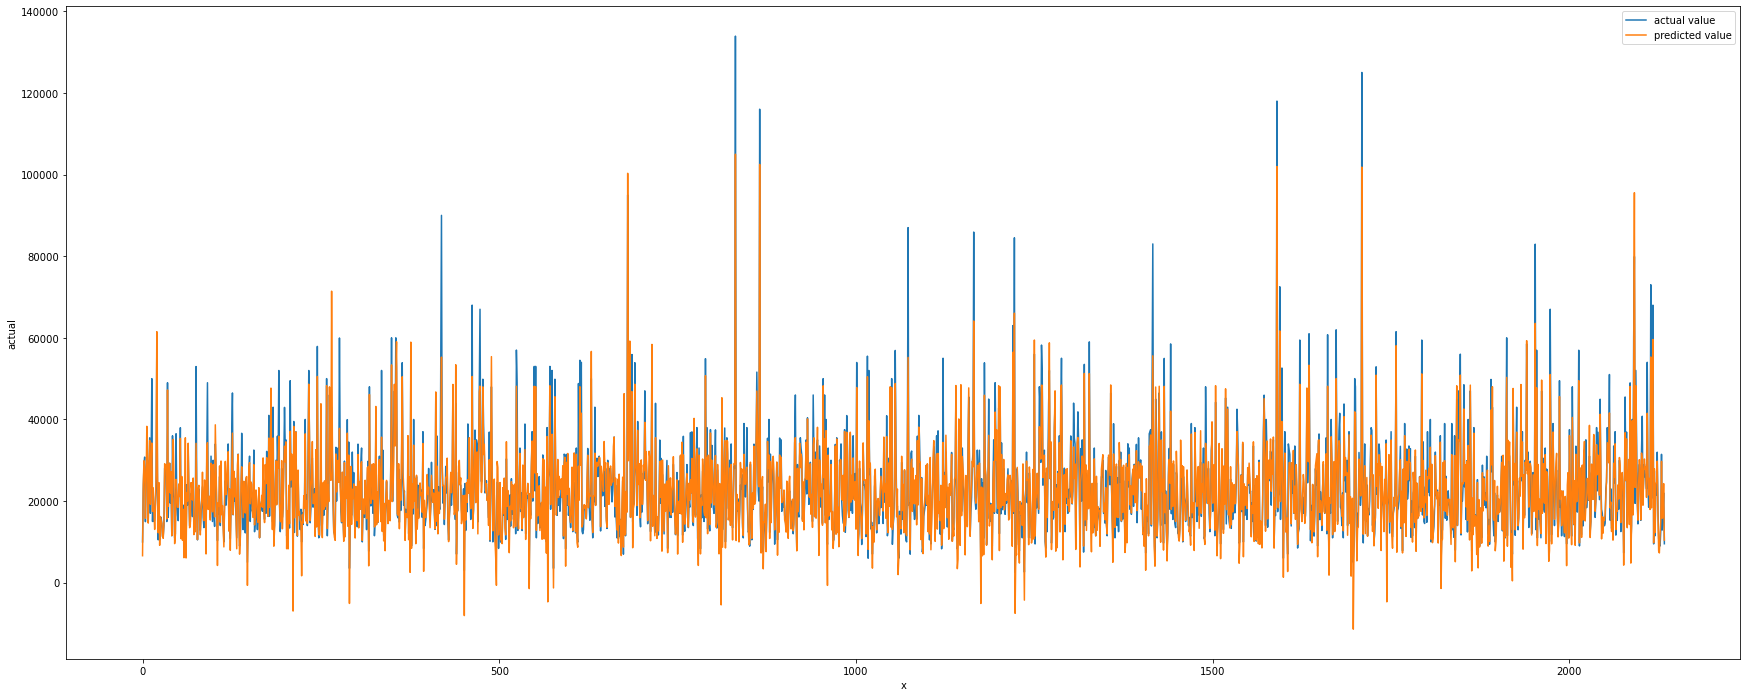

In [44]:
plt.figure(figsize=(30,12))
sns.lineplot(x=visualize['x'], y=visualize['actual'], label= 'actual value')
sns.lineplot(x=visualize['x'], y=visualize['prediction'], label= 'predicted value')
plt.show()

observations:

1. my model is predicting lower values

2. some values are predicted negetive

In [45]:
####scatterplot

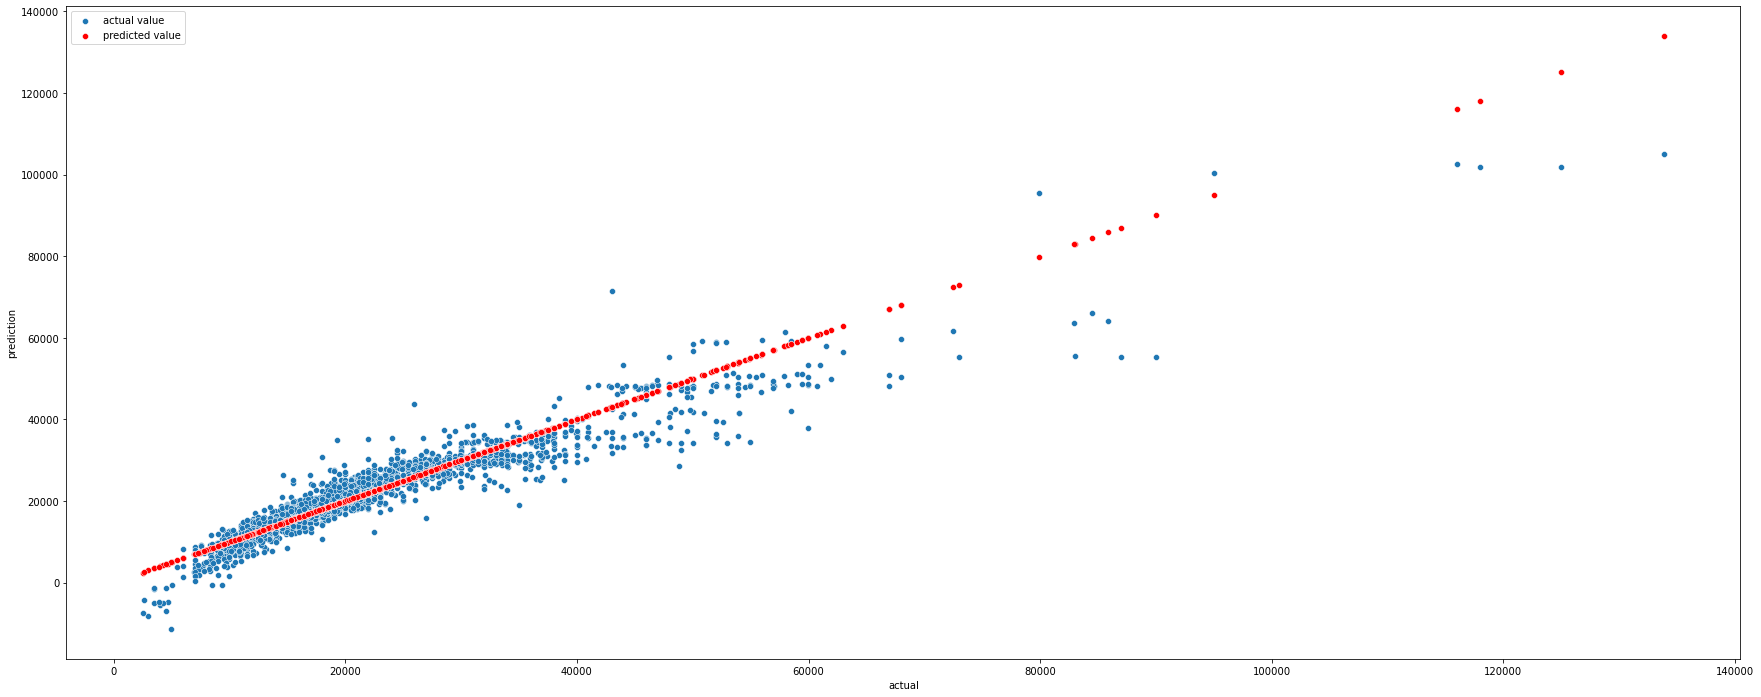

In [46]:
plt.figure(figsize=(30,12))
sns.scatterplot( x=visualize['actual'],y=visualize['prediction'], label= 'actual value')
sns.scatterplot(x=visualize['actual'], y=visualize['actual'], label= 'predicted value',color='red')
plt.show()

#                          Using label encoder

In [47]:
df=pd.read_csv(r"D:\Emk assignment\audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


In [48]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
mpg             float64
engineSize      float64
dtype: object

In [49]:
##### extracting objects ###

categical_feature=[feature for feature in df if df[feature].dtypes=='O']

In [50]:
categical_feature

['model', 'transmission', 'fuelType']

In [51]:
#### checking the number of all categorical values
for feature in categical_feature:
    print("Feature name",feature,"Unique value",df[feature].unique())
    print()

Feature name model Unique value [' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']

Feature name transmission Unique value ['Manual' 'Automatic' 'Semi-Auto']

Feature name fuelType Unique value ['Petrol' 'Diesel' 'Hybrid']



In [52]:
LE = LabelEncoder()
for feature in categical_feature:
    df[feature]= LE.fit_transform(df[feature])

In [53]:
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,0,2017,12500,1,15735,2,55.4,1.4
1,5,2016,16500,0,36203,0,64.2,2.0
2,0,2016,11000,1,29946,2,55.4,1.4
3,3,2017,16800,0,25952,0,67.3,2.0
4,2,2019,17300,1,1998,2,49.6,1.0


Training model

In [54]:
x=df.drop('price',axis=1)
y=df['price']

In [55]:
x

,model,year,transmission,mileage,fuelType,mpg,engineSize
0,0,2017,1,15735,2,55.4,1.4
1,5,2016,0,36203,0,64.2,2.0
2,0,2016,1,29946,2,55.4,1.4
3,3,2017,0,25952,0,67.3,2.0
4,2,2019,1,1998,2,49.6,1.0
...,...,...,...,...,...,...,...
10663,2,2020,1,4018,2,49.6,1.0
10664,2,2020,1,1978,2,49.6,1.0
10665,2,2020,1,609,2,49.6,1.0
10666,9,2017,0,8646,2,47.9,1.4


In [56]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8534, 7) (2134, 7) (8534,) (2134,)


In [57]:
reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [58]:
print("value of C (bias) for reg2 model:",reg2.intercept_)
print("value of Co efficient for reg2 model",reg2.coef_)

value of C (bias) for reg2 model: -4448578.893247406
value of Co efficient for reg2 model [ 2.49062882e+02  2.20956504e+03 -1.19207677e+02 -9.16930072e-02
  5.56012041e+02 -1.05949541e+02  1.05162960e+04]


In [59]:
coef_df=pd.DataFrame({"feature":x.columns,"Coefficient":np.squeeze(reg2.coef_)})
coef_df

,feature,Coefficient
0,model,249.062882
1,year,2209.565042
2,transmission,-119.207677
3,mileage,-0.091693
4,fuelType,556.012041
5,mpg,-105.949541
6,engineSize,10516.296006


# Checking errors

In [60]:
y_pred=reg2.predict(X_test)

In [61]:
reg2_df = pd.DataFrame({"actual":y_test, "predicted":y_pred})
reg2_df

,actual,predicted
10442,9990,7534.108400
2907,22382,23893.063058
7388,28990,28855.582739
3016,30777,26856.399464
7890,14950,14903.997504
...,...,...
8606,31450,31445.844360
8977,12900,18245.020882
3673,16750,15004.251069
1034,21996,24055.726452


In [62]:
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

MAPE=mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error = ", MAPE*100,"%")

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)   ### Squared= True means means square error, Squared= false means rmse
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  3534.985036772834
mean absolute percentage error =  17.69858665370471 %
mean squared error =  31682403.99701008
root mean squared error =  5628.7124635221935
coefficient of determination =  0.7903625420085352


# # Visualiazation of reg2 model

In [63]:
visualize=pd.DataFrame({'actual':y_test,'prediction':y_pred})
visualize['x'] = np.arange(0,y_test.shape[0],1).tolist()

In [64]:
visualize

,actual,prediction,x
10442,9990,7534.108400,0
2907,22382,23893.063058,1
7388,28990,28855.582739,2
3016,30777,26856.399464,3
7890,14950,14903.997504,4
...,...,...,...
8606,31450,31445.844360,2129
8977,12900,18245.020882,2130
3673,16750,15004.251069,2131
1034,21996,24055.726452,2132


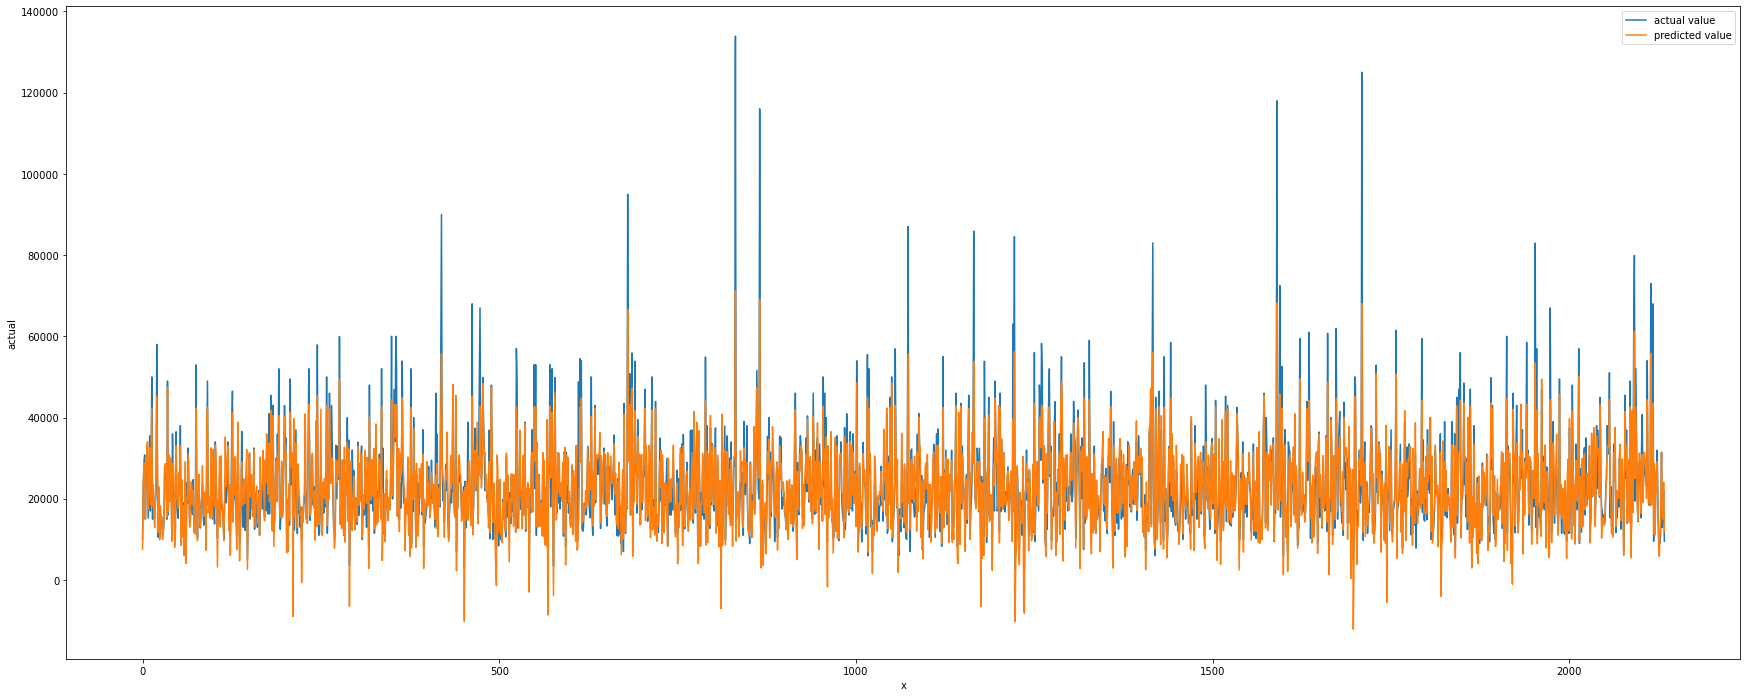

In [65]:
plt.figure(figsize=(30,12))
sns.lineplot(x=visualize['x'], y=visualize['actual'], label= 'actual value')
sns.lineplot(x=visualize['x'], y=visualize['prediction'], label= 'predicted value')
plt.show()

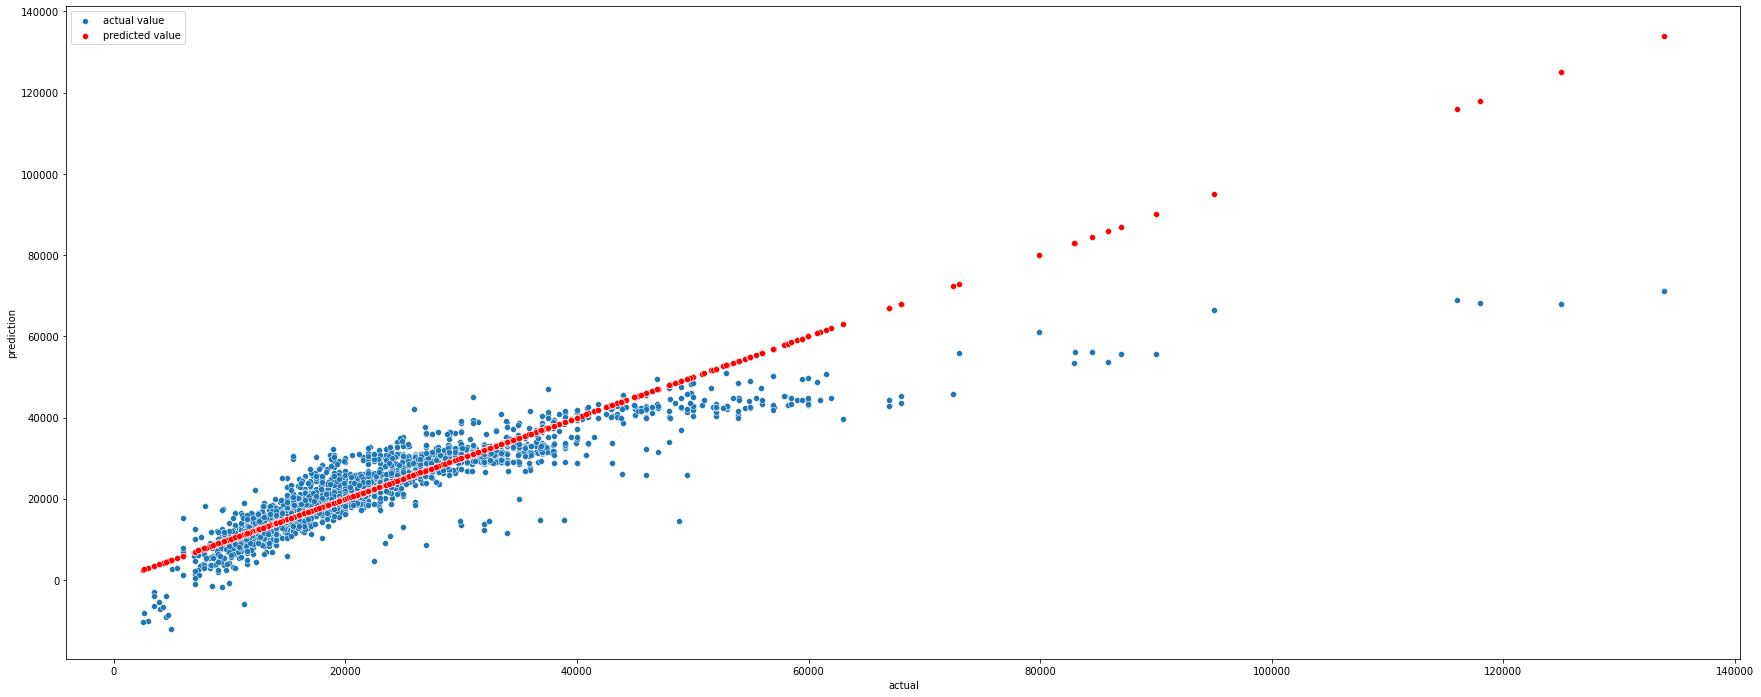

In [66]:
plt.figure(figsize=(30,12))
sns.scatterplot( x=visualize['actual'],y=visualize['prediction'], label= 'actual value')
sns.scatterplot(x=visualize['actual'], y=visualize['actual'], label= 'predicted value',color='red')
plt.show()